In [16]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

某年龄段的基准死亡率: (1 - 高一年龄段的占比/某一年龄段的占比)*100%

基准出生率：和当前新生人口占比相同（0-4岁）

设置基准出生率、死亡率是为了使得人口结构在迭代中精确地保持不变（Ⅰ阶段），才可以作为其他阶段的对照

In [365]:
age = ['95-99','90-94','85-89','80-84','75-79',
 '70-74','65-69','60-64','55-59',
 '50-54','45-49','40-44','35-39','30-34',
 '25-29','20-24','15-19','10-14','5-9','0-4']
 
ratio = np.array([10-0.5*x for x in range(20)])
ratio /= ratio.sum()
ratio *= 100 
ratio # 初始化：各年龄段的百分比

array([9.52380952, 9.04761905, 8.57142857, 8.0952381 , 7.61904762,
       7.14285714, 6.66666667, 6.19047619, 5.71428571, 5.23809524,
       4.76190476, 4.28571429, 3.80952381, 3.33333333, 2.85714286,
       2.38095238, 1.9047619 , 1.42857143, 0.95238095, 0.47619048])

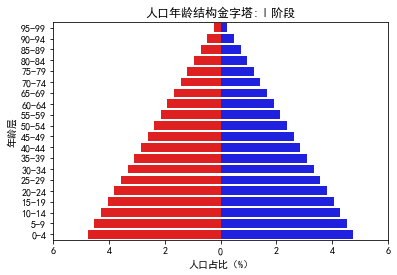

In [366]:
# I阶段：高出生率、高死亡率 

# 金字塔保持不变
birth = ratio[0]
death = 1-ratio[1:20]/ratio[:19]

# 迭代
ratio[1:20] = ratio[:19] * (1-death)
ratio[0] = birth 

# 归一
ratio /= ratio.sum()
ratio *= 100 
ratio # 各年龄段的百分比，以M为例

# 绘图
data = {'M': ratio/2, 'F': -ratio/2, 'index': age[::-1]}
bar_plot = sns.barplot(y = 'index', x = "F", color = "red", data = pd.DataFrame(data), order = age,)
bar_plot = sns.barplot(y = 'index', x = "M", color = "blue", data = pd.DataFrame(data), order = age,)
plt.xticks([-6,-4,-2,0,2,4,6],[6,4,2,0,2,4,6])
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
bar_plot.set(xlabel="人口占比（%）", ylabel="年龄层", title = "人口年龄结构金字塔:Ⅰ阶段")
plt.show()

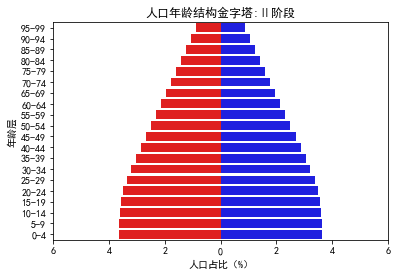

In [367]:
# Ⅱ阶段：死亡率下降，出生率不变
# 死亡率每年降低2%，经过20年降低至原先的60%

for year in range(20):
    birth = ratio[0]
    death = (1-ratio[1:20]/ratio[:19])*(1-0.02*year) 
    year += 1
    # 迭代
    ratio[1:20] = ratio[:19] * (1-death)
    ratio[0] = birth

    # 归一
    ratio /= ratio.sum()
    ratio *= 100

# 绘图
data = {'M': ratio/2, 'F': -ratio/2, 'index': age[::-1]}
bar_plot = sns.barplot(y = 'index', x = "F", color = "red", data = pd.DataFrame(data), order = age,)
bar_plot = sns.barplot(y = 'index', x = "M", color = "blue", data = pd.DataFrame(data), order = age,)
plt.xticks([-6,-4,-2,0,2,4,6],[6,4,2,0,2,4,6])
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
bar_plot.set(xlabel="人口占比（%）", ylabel="年龄层", title = "人口年龄结构金字塔:Ⅱ阶段")
plt.show()

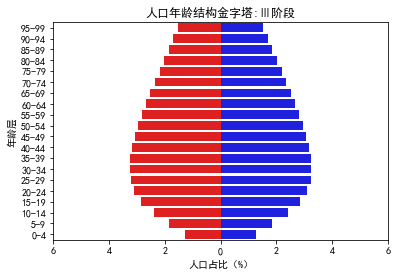

In [368]:
# Ⅲ阶段：死亡率下降变缓，出生率下降
# 出生率每年降低2%，经过10年降低至原先的80%
# 死亡率每年降低1%，经过10年由原先的60%降低至50%

for year in range(10):
    birth = ratio[0] * (1-year*0.02) 
    death = (1-ratio[1:20]/ratio[:19])*(0.6-year*0.01) 
    year += 1

    # 迭代
    ratio[1:20] = ratio[:19] * (1-death)
    ratio[0] = birth

    # 归一
    ratio /= ratio.sum()
    ratio *= 100

# 绘图
data = {'M': ratio/2, 'F': -ratio/2, 'index': age[::-1]}
bar_plot = sns.barplot(y = 'index', x = "F", color = "red", data = pd.DataFrame(data), order = age,)
bar_plot = sns.barplot(y = 'index', x = "M", color = "blue", data = pd.DataFrame(data), order = age,)
plt.xticks([-6,-4,-2,0,2,4,6],[6,4,2,0,2,4,6])
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
bar_plot.set(xlabel="人口占比（%）", ylabel="年龄层", title = "人口年龄结构金字塔:Ⅲ阶段")
plt.show()

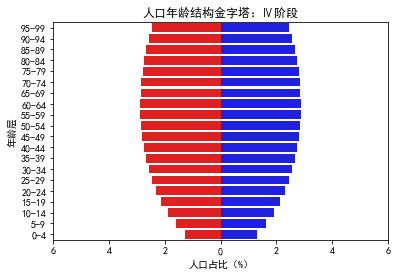

In [370]:
# Ⅳ阶段：死亡率低，出生率低
# 死亡率出生率均不变且保持双低,持续10年

for year in range(10): 
    # 迭代
    ratio[1:20] = ratio[:19] * (1-death)
    ratio[0] = birth

    # 归一
    ratio /= ratio.sum()
    ratio *= 100

# 绘图
data = {'M': ratio/2, 'F': -ratio/2, 'index': age[::-1]}
bar_plot = sns.barplot(y = 'index', x = "F", color = "red", data = pd.DataFrame(data), order = age,)
bar_plot = sns.barplot(y = 'index', x = "M", color = "blue", data = pd.DataFrame(data), order = age,)
plt.xticks([-6,-4,-2,0,2,4,6],[6,4,2,0,2,4,6])
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
bar_plot.set(xlabel="人口占比（%）", ylabel="年龄层", title = "人口年龄结构金字塔：Ⅳ阶段")
plt.show()